In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import torch.nn.functional as F

In [ ]:
%load_ext autoreload

In [ ]:
%autoreload 2

In [ ]:
from src.neural_network import DeepSymNet

In [7]:

from src.CTDataModule import CTDataModule

import pytorch_lightning as pl

from src.predictions import get_test_predictions
from src.neural_network import DeepSymNet
from src.utils import show_tensor


In [8]:
# ВСТАВЬ СВОЙ ПУТЬ К МОДЕЛИ
path_model = "/home/martinumer/Ischemic_Stroke_Prediction/lightning_logs/cancer_l_1/checkpoints/epoch=76-step=385.ckpt"
model = DeepSymNet.load_from_checkpoint(path_model)
model.eval()

DeepSymNet(
  (siamese_part): SiameseAndDifferenceBlock(
    (inception_chain): Sequential(
      (0): InceptionBlock(
        (branch_1filter): ConvBlock(
          (conv): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (branch_3filter): Sequential(
          (0): ConvBlock(
            (conv): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
            (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
          (1): ConvBlock(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (branch_5filter): Sequential(
          (0): ConvBlock(
            (conv): Conv2d(1, 64, kernel_size=(1, 1), stride=(1, 1))
            (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affi

In [9]:
# ВСТАВЬ СВОЙ ПУТЬ К ДАТАСЕТУ С ЛЕГКИМИ

test_dir = "/home/martinumer/CancerDataL/test"
dm_predict = CTDataModule(data_dir=test_dir,
                              batch_size=1,
                              num_workers=6,
                              test_shuffle=False)
dm_predict.setup('test')
dataloader = dm_predict.test_dataloader()
dataloader_iter = iter(dataloader)

img, label = next(dataloader_iter)

In [10]:
imges_and_labels = []

while len(imges_and_labels)<10:
    img, label = next(dataloader_iter)
    print('Label', label)
    if label == 1:
        break
    to_add_or_not_to_add = np.random.randint(0,2)
    print('Random', to_add_or_not_to_add)

    if to_add_or_not_to_add == 1:
        imges_and_labels.append(( img, label))

    print(imges_and_labels, '\n')

Label tensor([0])
Random 1
[(tensor([[[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]]), tensor([0]))] 

Label tensor([0])
Random 0
[(tensor([[[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]]), tensor([0]))] 

Label tensor([0])
Random 1
[(tensor([[[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.

In [11]:
while len(imges_and_labels)<20:
    img, label = next(dataloader_iter)
    if label == 0:
        continue
    to_add_or_not_to_add = np.random.randint(0,2)
    
    if to_add_or_not_to_add == 1:
        imges_and_labels.append(( img, label))




In [12]:
# List[Tuple[tensor, int]] -- первый элемент тьюпла: тензор картинки, второй - лэйбл картинки
imges_and_labels

[(tensor([[[[0.0000, 0.0000, 0.0039,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]]),
  tensor([0])),
 (tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0039, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            ...,
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
            [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]]),
  tensor([0])),
 (tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0

In [22]:
# Пройдись по всем 20-картинкам
i=19
current_img, current_label = imges_and_labels[i]
f'Current class is {current_label}'

'Current class is tensor([1])'

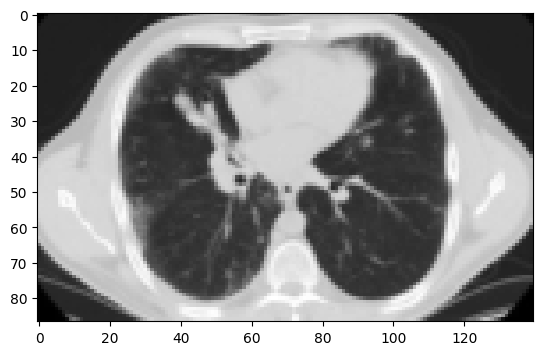

In [23]:
# нарисуй
show_tensor(current_img[0])

In [24]:
# проверь, что модель даёт правильный предикт
model(current_img)

tensor([0.9771], grad_fn=<ReshapeAliasBackward0>)